In [1]:
# Lets start by converting book, rating users into the appropriate rows and cols.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the data

books_df = pd.read_csv("../data/Books.csv")
users_df = pd.read_csv("../data/Users.csv")
ratings_df = pd.read_csv("../data/ratings.csv")

books_df.head()

C:\Users\NelsonWang\AppData\Local\Temp\ipykernel_8252\209608937.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("../data/Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [2]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [3]:
# Convert as folllowing standarized format:

"""

products:

| name           | type | description                               |
| -------------- | ---- | ----------------------------------------- |
| id             | str  | Unique identifier of the product          |
| product_title  | str  | Title of the product                      |
| product_image  | str  | Image of the product                      |
| product_price  | int  | Price of the product (if available)  |
| product_soup   | str  | All Aggregated Description of the product |
| product_tags   | str  | List of tags of the product, sep by comma |

From:

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],

"""

products_books = books_df.copy()
products_books['id'] = products_books["ISBN"]
products_books["product_title"] = products_books["Book-Title"]
products_books["product_image"] = products_books["Image-URL-M"]
products_books["product_price"] = np.nan
products_books["product_soup"] = products_books["Book-Title"] + " " + products_books["Book-Author"] + " " + products_books["Publisher"]
products_books["product_tags"] = np.nan


products_books = products_books[["id", "product_title", "product_image", "product_price", "product_soup", "product_tags"]]
products_books.head()

,id,product_title,product_image,product_price,product_soup,product_tags
0,0195153448,Classical Mythology,http://images.amazon.com/images/P/0195153448.0...,NaN,Classical Mythology Mark P. O. Morford Oxford ...,NaN
1,0002005018,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,NaN,Clara Callan Richard Bruce Wright HarperFlamin...,NaN
2,0060973129,Decision in Normandy,http://images.amazon.com/images/P/0060973129.0...,NaN,Decision in Normandy Carlo D'Este HarperPerennial,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,http://images.amazon.com/images/P/0374157065.0...,NaN,Flu: The Story of the Great Influenza Pandemic...,NaN
4,0393045218,The Mummies of Urumchi,http://images.amazon.com/images/P/0393045218.0...,NaN,The Mummies of Urumchi E. J. W. Barber W. W. N...,NaN


In [4]:
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [5]:
# Convert Transactions as standarized format


"""
To: 
| name       | type | description                          |
| ---------- | ---- | ------------------------------------ |
| id         | str  | Unique identifier of the transaction |
| user_id    | str  | Unique identifier of the user        |
| product_id | str  | Unique identifier of the product     |
| rate       | int  | Positive association rating          |

From: ratings_df.columns
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

"""

transactions_books = ratings_df.copy()

random_id = np.random.randint(0, 100000, len(transactions_books))
transactions_books["id"] = transactions_books["User-ID"].astype(str) + "-" + transactions_books["ISBN"] + str(random_id)
transactions_books["user_id"] = transactions_books["User-ID"]
transactions_books["product_id"] = transactions_books["ISBN"]
transactions_books["rate"] = transactions_books["Book-Rating"]

transactions_books = transactions_books[["id", "user_id", "product_id", "rate"]]

transactions_books.head()

,id,user_id,product_id,rate
0,276725-034545104X[ 8105 1275 44453 ... 27370 ...,276725,034545104X,0
1,276726-0155061224[ 8105 1275 44453 ... 27370 ...,276726,0155061224,5
2,276727-0446520802[ 8105 1275 44453 ... 27370 ...,276727,0446520802,0
3,276729-052165615X[ 8105 1275 44453 ... 27370 ...,276729,052165615X,3
4,276729-0521795028[ 8105 1275 44453 ... 27370 ...,276729,0521795028,6


In [6]:

# remove products where under x interactions in total.

def remove_under_interactions(df, col_name, threshhold=10):
    # Find id of products where total aggregated mentions in transactiosn is less than 50.
    counts = df[col_name].value_counts()
    df = df[df[col_name].isin(counts[counts > threshhold].index)]
    return df




In [7]:
print(len(transactions_books))
print('unique products:', len(transactions_books["product_id"].unique()))
print('unique users:', len(transactions_books["user_id"].unique()))

transactions = transactions_books

1149780
unique products: 340556
unique users: 105283


20 764346
30 835391
40 881536
50 915487
60 942827
70 965940
80 984400
90 998940
100 1012319
110 1023905
120 1031724
130 1040761
140 1049828
150 1057114
160 1062239
170 1069015
180 1074810
190 1079976


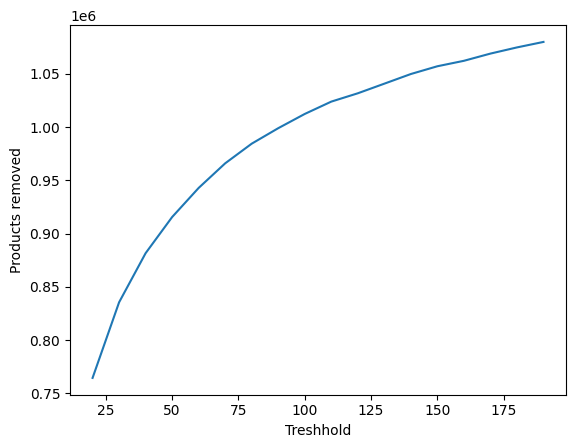

In [21]:
# Chart how many books are removed if treshhold increases from 20 - 200 by 10

import matplotlib.pyplot as plt

y_data = []
for i in range(20, 200, 10):
    transactions = remove_under_interactions(transactions_books, "product_id", i)
    print(i, len(transactions_books) - len(transactions)) 
    y_data.append(len(transactions_books) - len(transactions))

plt.plot(range(20, 200, 10), y_data)
plt.xlabel("Treshhold")
plt.ylabel("Products removed")
plt.show()

In [23]:
# Lets keep it at 30 as a treshhold.

prev_transaction_count = -1
transactions = transactions_books
print('Start count of transactions', len(transactions_books))
print("Unique books: ", len(transactions["product_id"].unique()))
print("Unique users: ", len(transactions["user_id"].unique()))

while(prev_transaction_count != len(transactions)):
    transactions = remove_under_interactions(transactions, "product_id", 10)
    transactions = remove_under_interactions(transactions, "user_id", 10)
    prev_transaction_count = len(transactions)

print('final count of transactions', len(transactions) )
print("Unique books: ", len(transactions["product_id"].unique()))
print("Unique users: ", len(transactions["user_id"].unique()))

Start count of transactions 1149780
Unique books:  340556
Unique users:  105283
final count of transactions 390021
Unique books:  16145
Unique users:  6657


In [24]:
# Save.

products_books = products_books[products_books["id"].isin(transactions["product_id"].unique())]
products_books.to_csv("../data/products_books_v1.csv", index=False)

transactions_books = transactions_books[transactions_books["product_id"].isin(products_books["id"])]
transactions_books.to_csv("../data/transactions_books_V1.csv", index=False)